In [2]:
import pandas as pd

import time

import duckdb
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import streamlit as st

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import numpy
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import root_mean_squared_error,mean_squared_error, r2_score
#%matplotlib notebook
#matplotlib.use('Agg')

In [3]:
conn = duckdb.connect()  

In [4]:
query = """
CREATE TABLE mytable AS
SELECT 
    column00 AS ID,
    column01 AS Diagnosis,
    column02 AS radius1,
    column03 AS texture1,
    column04 AS perimeter1,
    column05 AS area1,
    column06 AS smoothness1,
    column07 AS compactness1,
    column08 AS concavity1,
    column09 AS concave_points1,
    column10 AS symmetry1,
    column11 AS fractal_dimension1,
    column12 AS radius2,
    column13 AS texture2,
    column14 AS perimeter2,
    column15 AS area2,
    column16 AS smoothness2,
    column17 AS compactness2,
    column18 AS concavity2,
    column19 AS concave_points2,
    column20 AS symmetry2,
    column21 AS fractal_dimension2,
    column22 AS radius3,
    column23 AS texture3,
    column24 AS perimeter3,
    column25 AS area3,
    column26 AS smoothness3,
    column27 AS compactness3,
    column28 AS concavity3,
    column29 AS concave_points3,
    column30 AS symmetry3,
    column31 AS fractal_dimension3,
    

FROM read_csv_auto('wdbc.data');
"""
 #Creates table (executes the query above)
conn.execute(query)

In [17]:
## select all the datatable (* means all columns)
query = """
select * 
from mytable
"""
# transform into dataframe (same as R)
df = conn.sql(query).df()
df_with_id = df.copy()

df = df.drop('ID', axis=1)
df


,Diagnosis,radius1,texture1,perimeter1,area1,smoothness1,compactness1,concavity1,concave_points1,symmetry1,...,radius3,texture3,perimeter3,area3,smoothness3,compactness3,concavity3,concave_points3,symmetry3,fractal_dimension3
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [ ]:
df["Diagnosis"]=  df["Diagnosis"].map({"M": 1, "B": 0})
df["Diagnosis"].value_counts()
#No nulls

Diagnosis
0    357
1    212
Name: count, dtype: int64

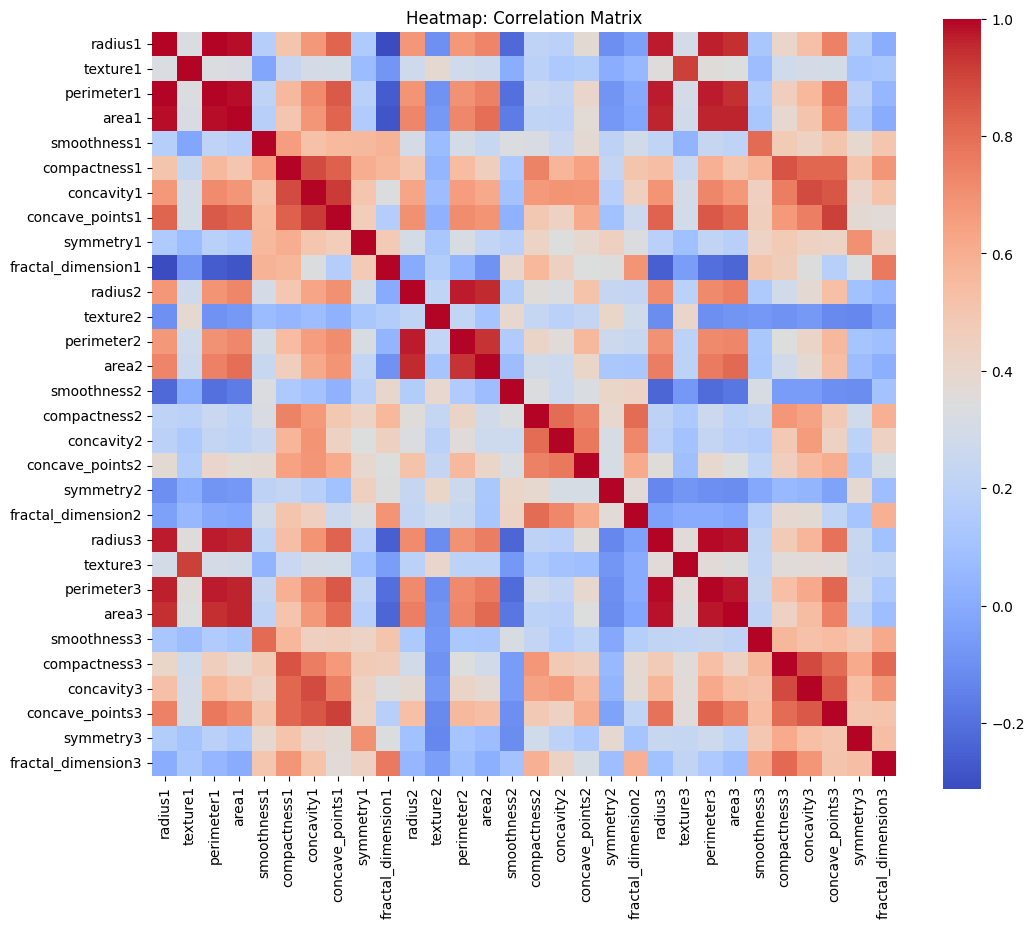

In [22]:
correlation_matrix = df.drop('Diagnosis', axis=1).corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, cmap='coolwarm', cbar=True, square=True, annot=False)
plt.title('Heatmap: Correlation Matrix')
plt.show()

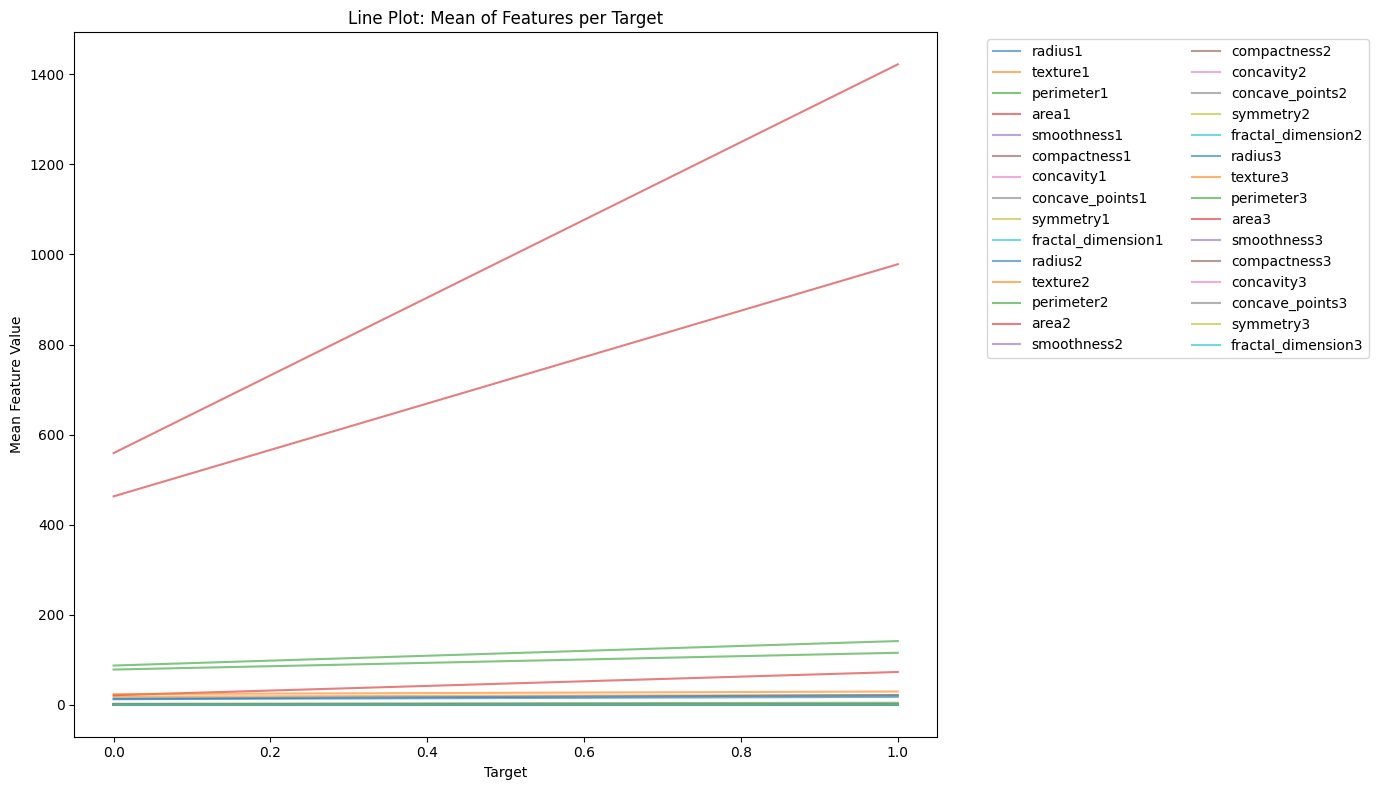

In [21]:
# Calcular a média das features agrupadas por target
mean_features = df.groupby('Diagnosis').mean()

plt.figure(figsize=(14, 8))
for feature in mean_features.columns:
    plt.plot(mean_features.index, mean_features[feature], label=feature, alpha=0.6)
    
plt.title('Line Plot: Mean of Features per Target')
plt.xlabel('Target')
plt.ylabel('Mean Feature Value')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', ncol=2)
plt.tight_layout()
plt.show()

In [9]:
query = """
select Diagnosis,
    AVG(radius1) AS avg_radius1,
    AVG(radius2) AS avg_radius2,
    AVG(radius3) AS avg_radius3  
from mytable
GROUP BY Diagnosis
"""
# transform into dataframe (same as R)
df1 = conn.sql(query).df()
df1

,Diagnosis,avg_radius1,avg_radius2,avg_radius3
0,B,12.146524,0.284082,13.379801
1,M,17.462830,0.609083,21.134811


<!-- 
### import packages that will be necessary down the line
import time

import duckdb
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import streamlit as st


## connecting to duckdb
conn = duckdb.connect()

# making a query that creates the table from my dataset downloaded from the internet
query = """
CREATE TABLE mytable AS
SELECT 
    column0 AS sepal_length,
    column1 AS sepal_width,
    column2 AS petal_length,
    column3 AS petal_width,
    column4 AS species
FROM read_csv_auto('iris/iris.data');
"""
# Creates table (executes the query above)
conn.execute(query)

# Part 1: Testing with Duck DB show()
start_time = time.time()

## select all the datatable (* means all columns)
query = """
select * 
from mytable
"""
# transform into dataframe (same as R)
df = conn.sql(query).df()


# title of the dashboard
st.title("Streamlit + duckdb Tutorial")
try:
    #create a button to use
    button = st.button(label="Check for a sample")

    # if button is pressed do something
    if button:
        # title if button is pressed
        st.write("## Sample")
        # show dataframe (first 10 rows) if button is pressed.
        st.dataframe(df.head(10), height=300)

    # another title
    st.write("## Visualization")
    ## create a selection box with the 4 options (sepal and petal length and width)
    option = st.selectbox(
        "Select a dimension",
        ["sepal_length", "sepal_width", "petal_width", "petal_length"],
        key="option",
    )
    # if a option is selected show something
    if option:
        # second option to use in double plots
        option2 = st.selectbox(
            "Select another dimension",
            ["sepal_length", "sepal_width", "petal_width", "petal_length"],
            key="option2",
        )
        # another title (is using markdown - hence the ###)
        st.write(f"### Scatter Plot: {option} x {option2}")

        ## create a scatter plot 
        fig = px.scatter(
            df,
            x=option,
            y=option2,
            color="species",
            hover_name="species",
            log_x=True,
        )

        # This is the default. So you can also omit the theme argument.
        st.plotly_chart(fig, theme="streamlit", use_container_width=True)
        
        # another title
        st.write(f"### Boxplot: {option} x Specices")
        # another setup of plot
        fig, ax = plt.subplots()


        # a boxplot with the seaborn lib (see above)
        sns.boxplot(data=df, x="species", y=option, ax=ax)
        # adding it to the dashboard
        st.pyplot(fig)

        st.write("### Bar Chart: Species x Count")
        st.bar_chart(df["species"].value_counts())

    st.write("## Filters (by Species)")
    distinct_query = "SELECT DISTINCT species FROM mytable;"
    distinct_values = conn.execute(distinct_query).fetchall()

    # Convert results to a list of distinct values
    distinct_values_list = [value[0] for value in distinct_values]

    product_filter = st.selectbox(
        label="Select a specices", options=distinct_values_list, key="product_filter"
    )
    if product_filter != "--":
        query = (
            """
        select * from mytable where species = '"""
            + product_filter
            + """'
        """
        )

        result = conn.sql(query).df()
        st.dataframe(result.head(5))

        # To download the data we have just selected
        st.title("Boxplot Visualization ")

        # Plotting the boxplot
        st.write(f"Boxplot of `{product_filter}` ")

        fig, ax = plt.subplots()

        sns.boxplot(data=result, x="species", y="petal_width", ax=ax)
        st.pyplot(fig)
        query = (
            """
                select petal_length,sepal_length from mytable where species = '"""
            + product_filter
            + """'
                """
        )

        query = (
            """
        select petal_length,sepal_length from mytable where species = '"""
            + product_filter
            + """'
        """
        )

        tworesult = conn.sql(query).df()
        fig, ax = plt.subplots(figsize=(10, 6))
        sns.histplot(tworesult, kde=True, bins=30, color="blue", label="x")
        st.title("Histplot")

        st.pyplot(fig)


except (
    duckdb.CatalogException
):  # Catch exception when the database file don't exist yet
    st.text("Please Clik on the above button to generate data.")

    
 
 -->

In [13]:
df.info()
"""
    Important Metadatas
    2) Diagnosis (M = malignant, B = benign)

    Ten real-valued features are computed for each cell nucleus:

	a) radius (mean of distances from center to points on the perimeter)
	b) texture (standard deviation of gray-scale values)
	c) perimeter
	d) area
	e) smoothness (local variation in radius lengths)
	f) compactness (perimeter^2 / area - 1.0)
	g) concavity (severity of concave portions of the contour)
	h) concave points (number of concave portions of the contour)
	i) symmetry 
	j) fractal dimension ("coastline approximation" - 1)
"""

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  569 non-null    int64  
 1   Diagnosis           569 non-null    object 
 2   radius1             569 non-null    float64
 3   texture1            569 non-null    float64
 4   perimeter1          569 non-null    float64
 5   area1               569 non-null    float64
 6   smoothness1         569 non-null    float64
 7   compactness1        569 non-null    float64
 8   concavity1          569 non-null    float64
 9   concave_points1     569 non-null    float64
 10  symmetry1           569 non-null    float64
 11  fractal_dimension1  569 non-null    float64
 12  radius2             569 non-null    float64
 13  texture2            569 non-null    float64
 14  perimeter2          569 non-null    float64
 15  area2               569 non-null    float64
 16  smoothne

'\n    Important Metadatas\n    2) Diagnosis (M = malignant, B = benign)\n\n    Ten real-valued features are computed for each cell nucleus:\n\n\ta) radius (mean of distances from center to points on the perimeter)\n\tb) texture (standard deviation of gray-scale values)\n\tc) perimeter\n\td) area\n\te) smoothness (local variation in radius lengths)\n\tf) compactness (perimeter^2 / area - 1.0)\n\tg) concavity (severity of concave portions of the contour)\n\th) concave points (number of concave portions of the contour)\n\ti) symmetry \n\tj) fractal dimension ("coastline approximation" - 1)\n'

In [ ]:
df.describe()


,ID,radius1,texture1,perimeter1,area1,smoothness1,compactness1,concavity1,concave_points1,symmetry1,...,radius3,texture3,perimeter3,area3,smoothness3,compactness3,concavity3,concave_points3,symmetry3,fractal_dimension3
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


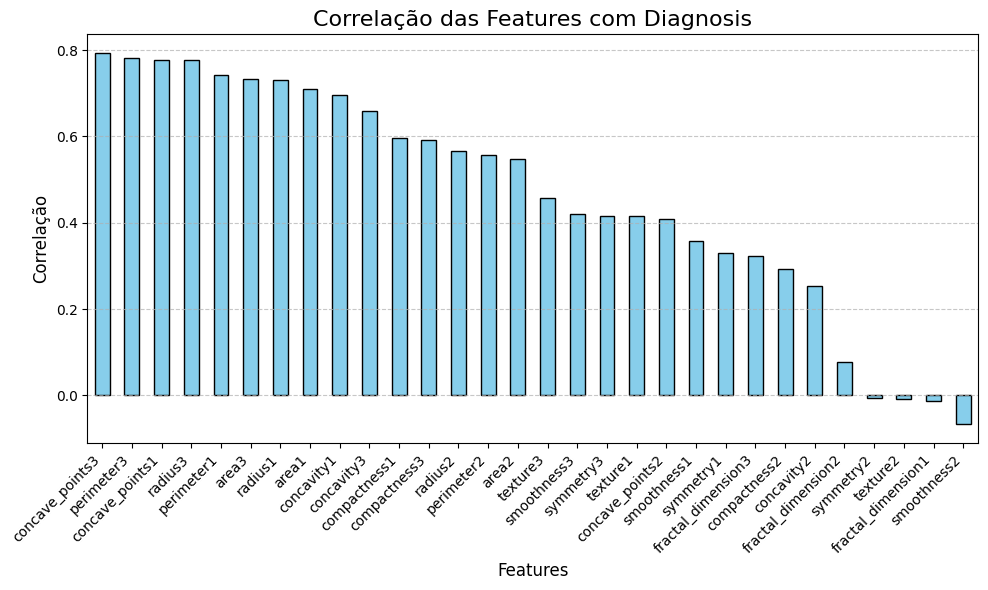

In [11]:
correlations = df.drop(columns=["ID"]).corr()["Diagnosis"].sort_values(ascending=False)
correlations = correlations.drop("Diagnosis")  # Remove a própria correlação de Diagnosis

# Criar o gráfico de barras
plt.figure(figsize=(10, 6))
correlations.plot(kind="bar", color="skyblue", edgecolor="black")

# Customizar o gráfico
plt.title("Correlação das Features com Diagnosis", fontsize=16)
plt.xlabel("Features", fontsize=12)
plt.ylabel("Correlação", fontsize=12)
plt.xticks(rotation=45, ha="right", fontsize=10)
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Exibir o gráfico
plt.tight_layout()
plt.show()

In [ ]:
plt.figure(figsize=(10, 6))
df.plot(kind="bar", color="skyblue", edgecolor="black")

# Customizar o gráfico
plt.title("Correlação das Features com Diagnosis", fontsize=16)
plt.xlabel("Features", fontsize=12)
plt.ylabel("Correlação", fontsize=12)
plt.xticks(rotation=45, ha="right", fontsize=10)
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Exibir o gráfico
plt.tight_layout()
plt.show()

In [35]:


X = df.drop(columns=["ID", "Diagnosis"])
y = df["Diagnosis"]

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state= 42)
model = LogisticRegression(max_iter= 10000)
model.fit(X_train,y_train)

LogisticRegression(max_iter=10000)

In [ ]:
coefficients = model.coef_[0]
feature_names = X_train.columns
significant_features = list(zip(feature_names, coefficients))
print("Coeficientes das Features:")
for name, coef in significant_features:
    print(f"{name}: {coef:.4f}")

Coeficientes das Features:
radius1: -0.9856
texture1: -0.2271
perimeter1: 0.3705
area1: -0.0264
smoothness1: 0.1555
compactness1: 0.2304
concavity1: 0.5223
concave_points1: 0.2800
symmetry1: 0.2242
fractal_dimension1: 0.0358
radius2: 0.0958
texture2: -1.3953
perimeter2: 0.1776
area2: 0.0884
smoothness2: 0.0222
compactness2: -0.0502
concavity2: 0.0385
concave_points2: 0.0316
symmetry2: 0.0335
fractal_dimension2: -0.0121
radius3: -0.0852
texture3: 0.5164
perimeter3: 0.0152
area3: 0.0166
smoothness3: 0.3072
compactness3: 0.7612
concavity3: 1.4120
concave_points3: 0.5058
symmetry3: 0.7407
fractal_dimension3: 0.0995
